Impoertan Imports

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('dark_background')
train_scores = []
test_scores = []

In [43]:
total_df =pd.read_csv('/content/train.csv');

total_df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [44]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [45]:
total_df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [46]:
total_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [47]:
total_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

Train/Test Split

In [48]:
X =total_df.iloc[:, :-1]
y = total_df.iloc[:, -1]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=44,shuffle=True,test_size=0.33)
print("Xtrain shape is:\n", Xtrain.shape)
print("ytrain shape is:\n", ytrain.shape)
print("Xtest shape is:\n", Xtest.shape)
print("ytest shape is:\n",ytest.shape)


Xtrain shape is:
 (1340, 20)
ytrain shape is:
 (1340,)
Xtest shape is:
 (660, 20)
ytest shape is:
 (660,)


Some Important plottings

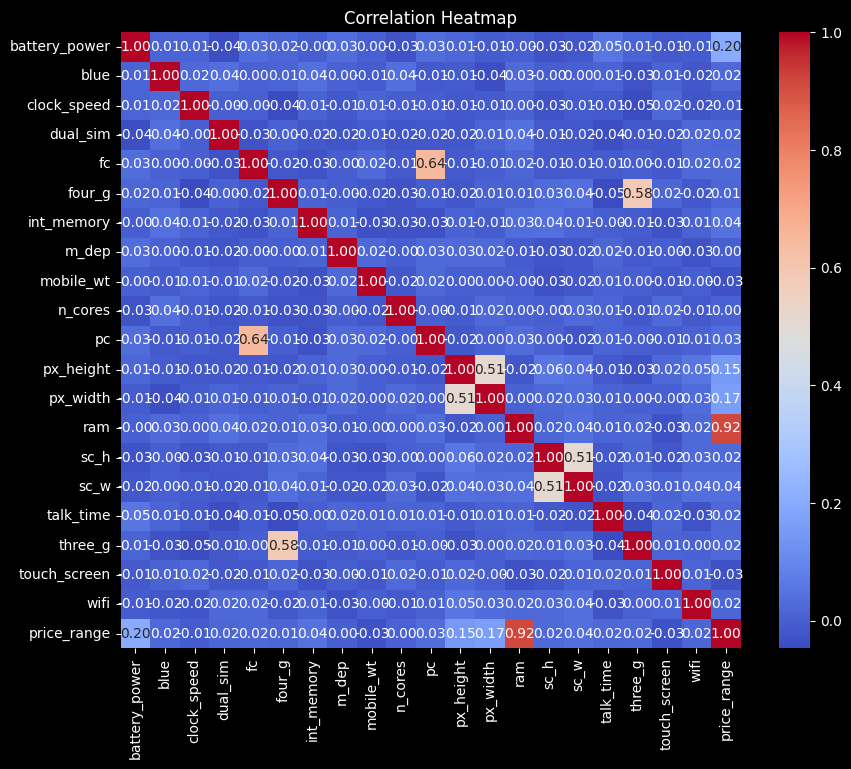

In [49]:

corr_matrix = total_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

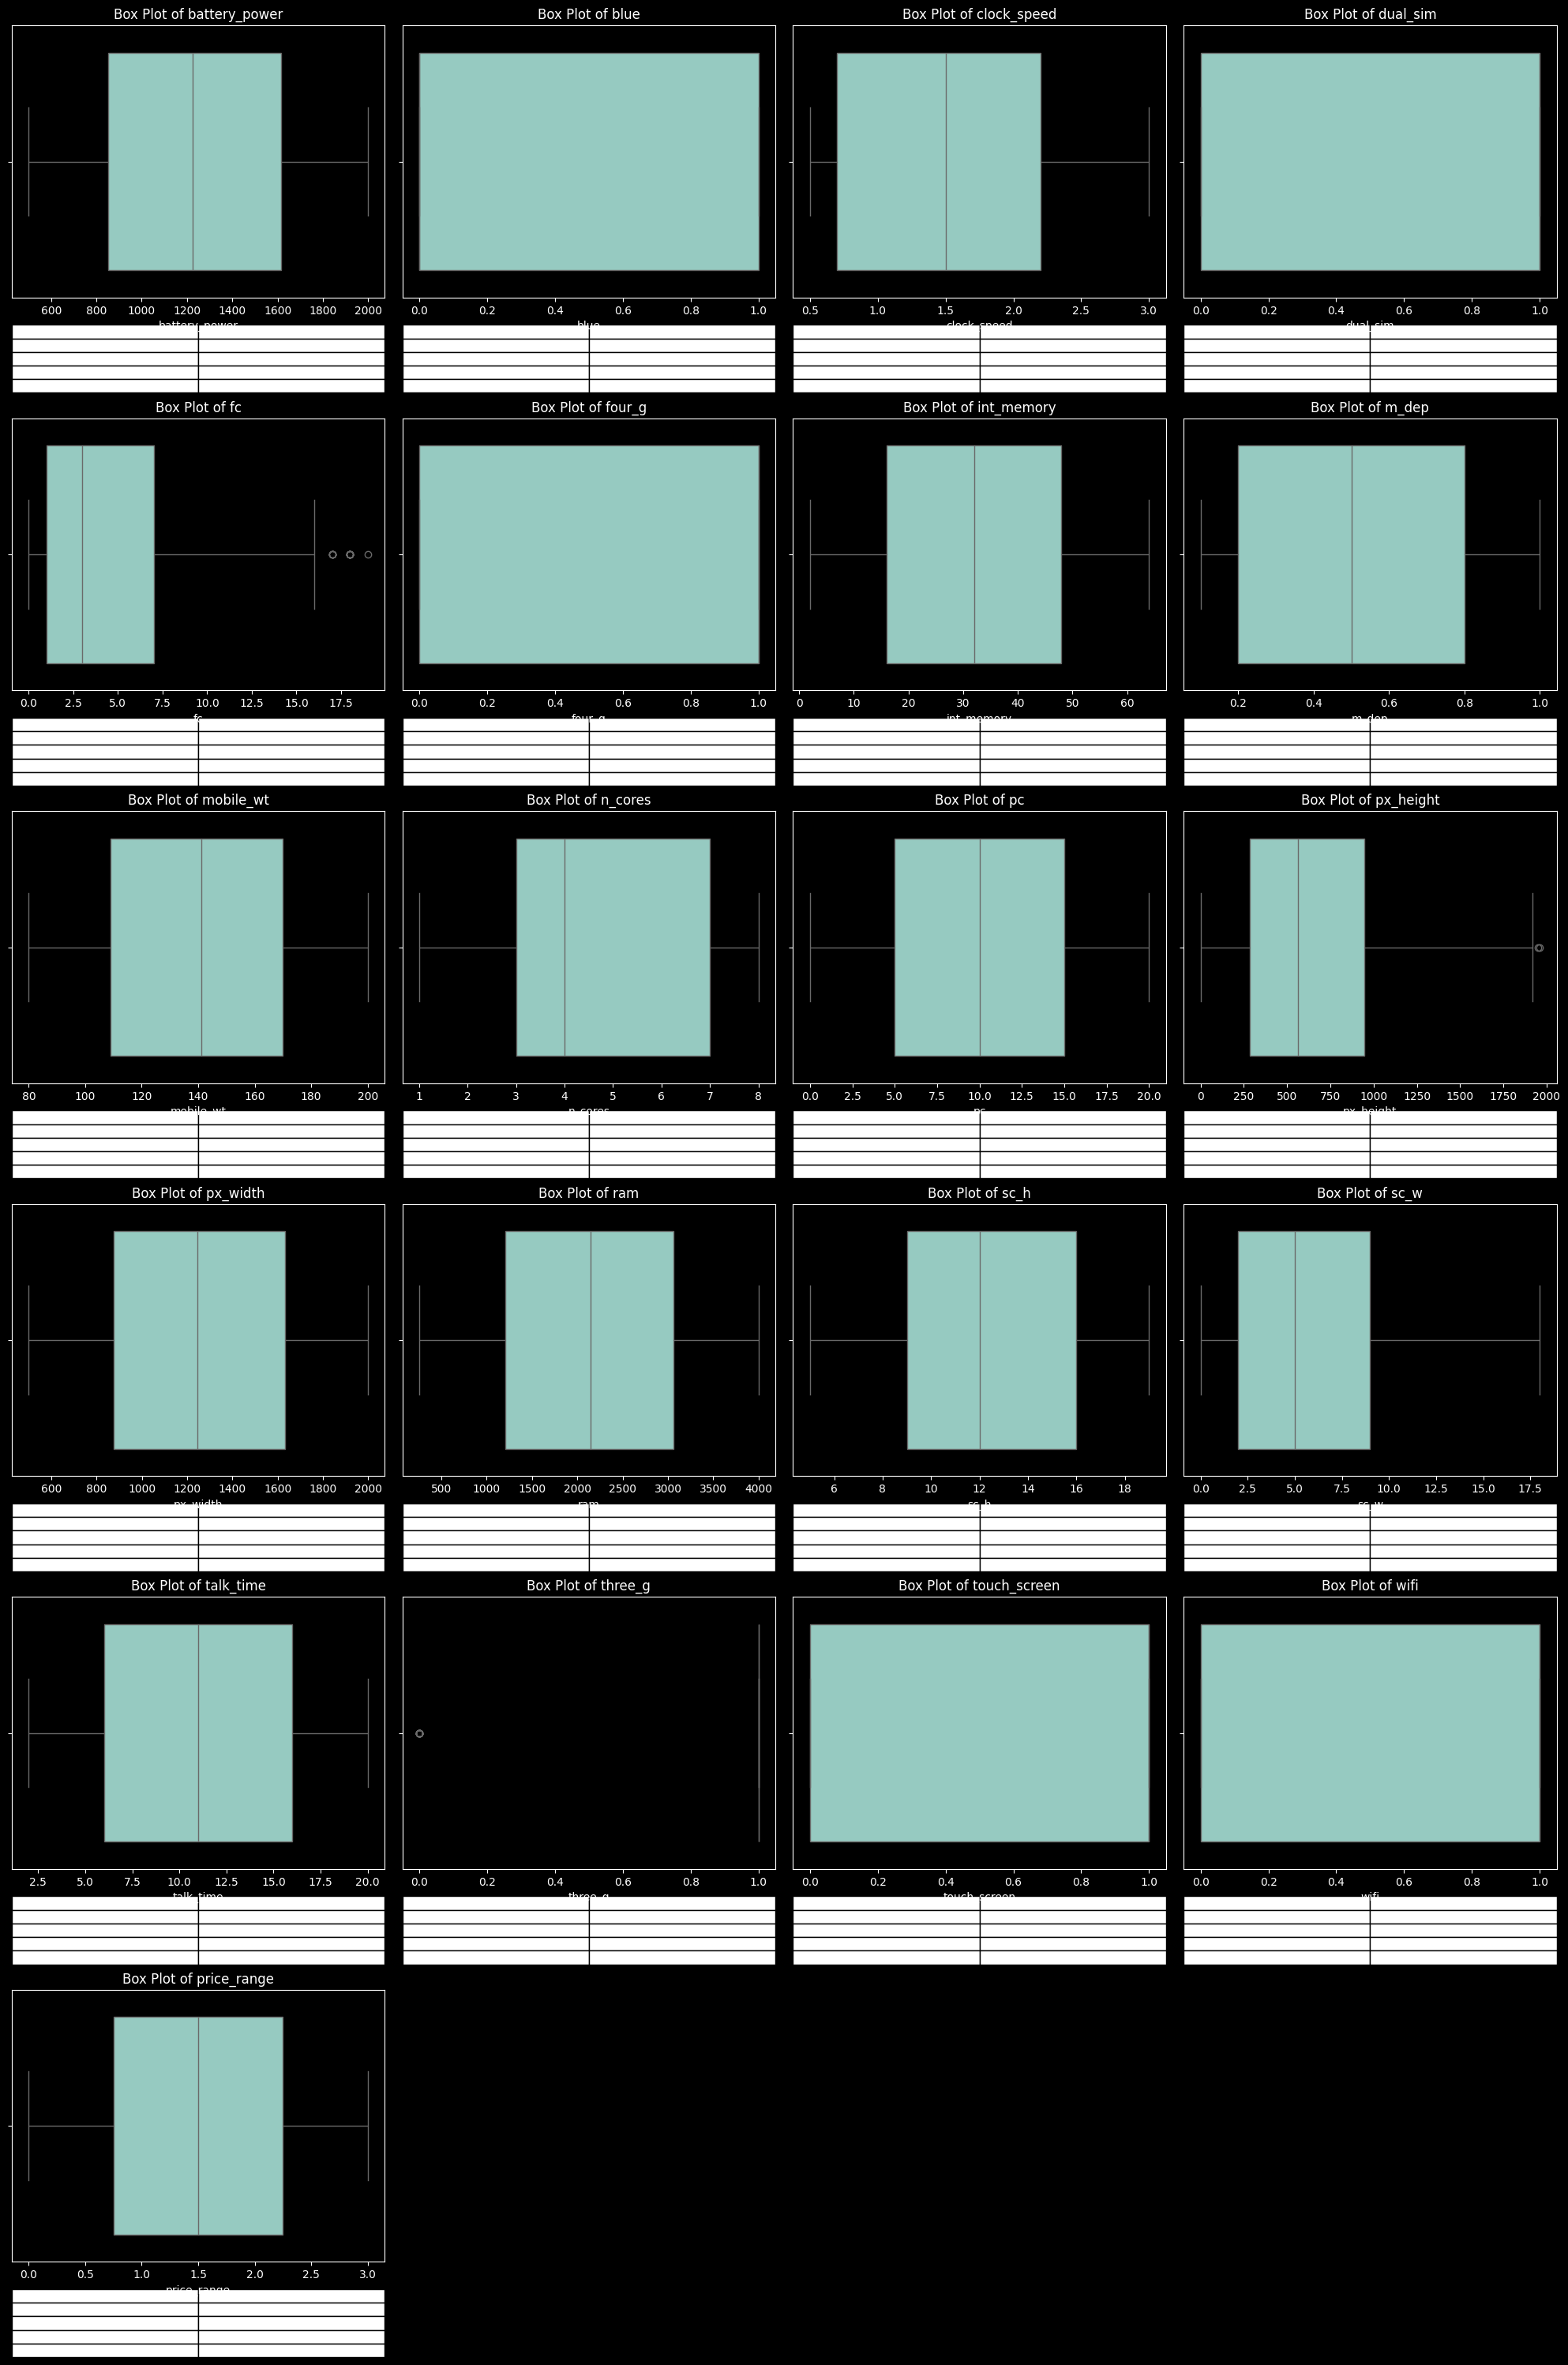

In [51]:
quartiles = total_df.describe(percentiles=[.25, .5, .75])

# Determine the number of rows and columns for subplots
num_features = len(total_df.columns)
num_rows = int(np.ceil(num_features / 4))  # Adjust the number of columns as needed
num_cols = min(4, num_features)  # Maximum of 4 columns per row

# Create subplots with multiple box plots arranged in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array if necessary
if num_features == 1:
    axes = np.array([axes])

# Create box plots and tables for all numerical columns
for i, column in enumerate(total_df.columns):
    row_index = i // num_cols
    col_index = i % num_cols

    # Create box plot
    ax = sns.boxplot(x=total_df[column], ax=axes[row_index, col_index])
    ax.set_title(f'Box Plot of {column}')

    # Create table to display quartile values
    q1, q2, q3, q4 = quartiles[column].loc[['25%', '50%', '75%', 'max']]
    table_data = [['Q1 (25%)', f'{q1:.2f}'],
                  ['Q2 (50%)', f'{q2:.2f}'],
                  ['Q3 (75%)', f'{q3:.2f}'],
                  ['Q4 (max)', f'{q4:.2f}']]

    table = axes[row_index, col_index].table(cellText=table_data, colLabels=['Quartile', 'Value'],
                                              cellLoc='center', loc='bottom', bbox=[0, -0.35, 1, 0.25])

# Remove empty subplots
for i in range(len(total_df.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<Figure size 2000x1600 with 0 Axes>

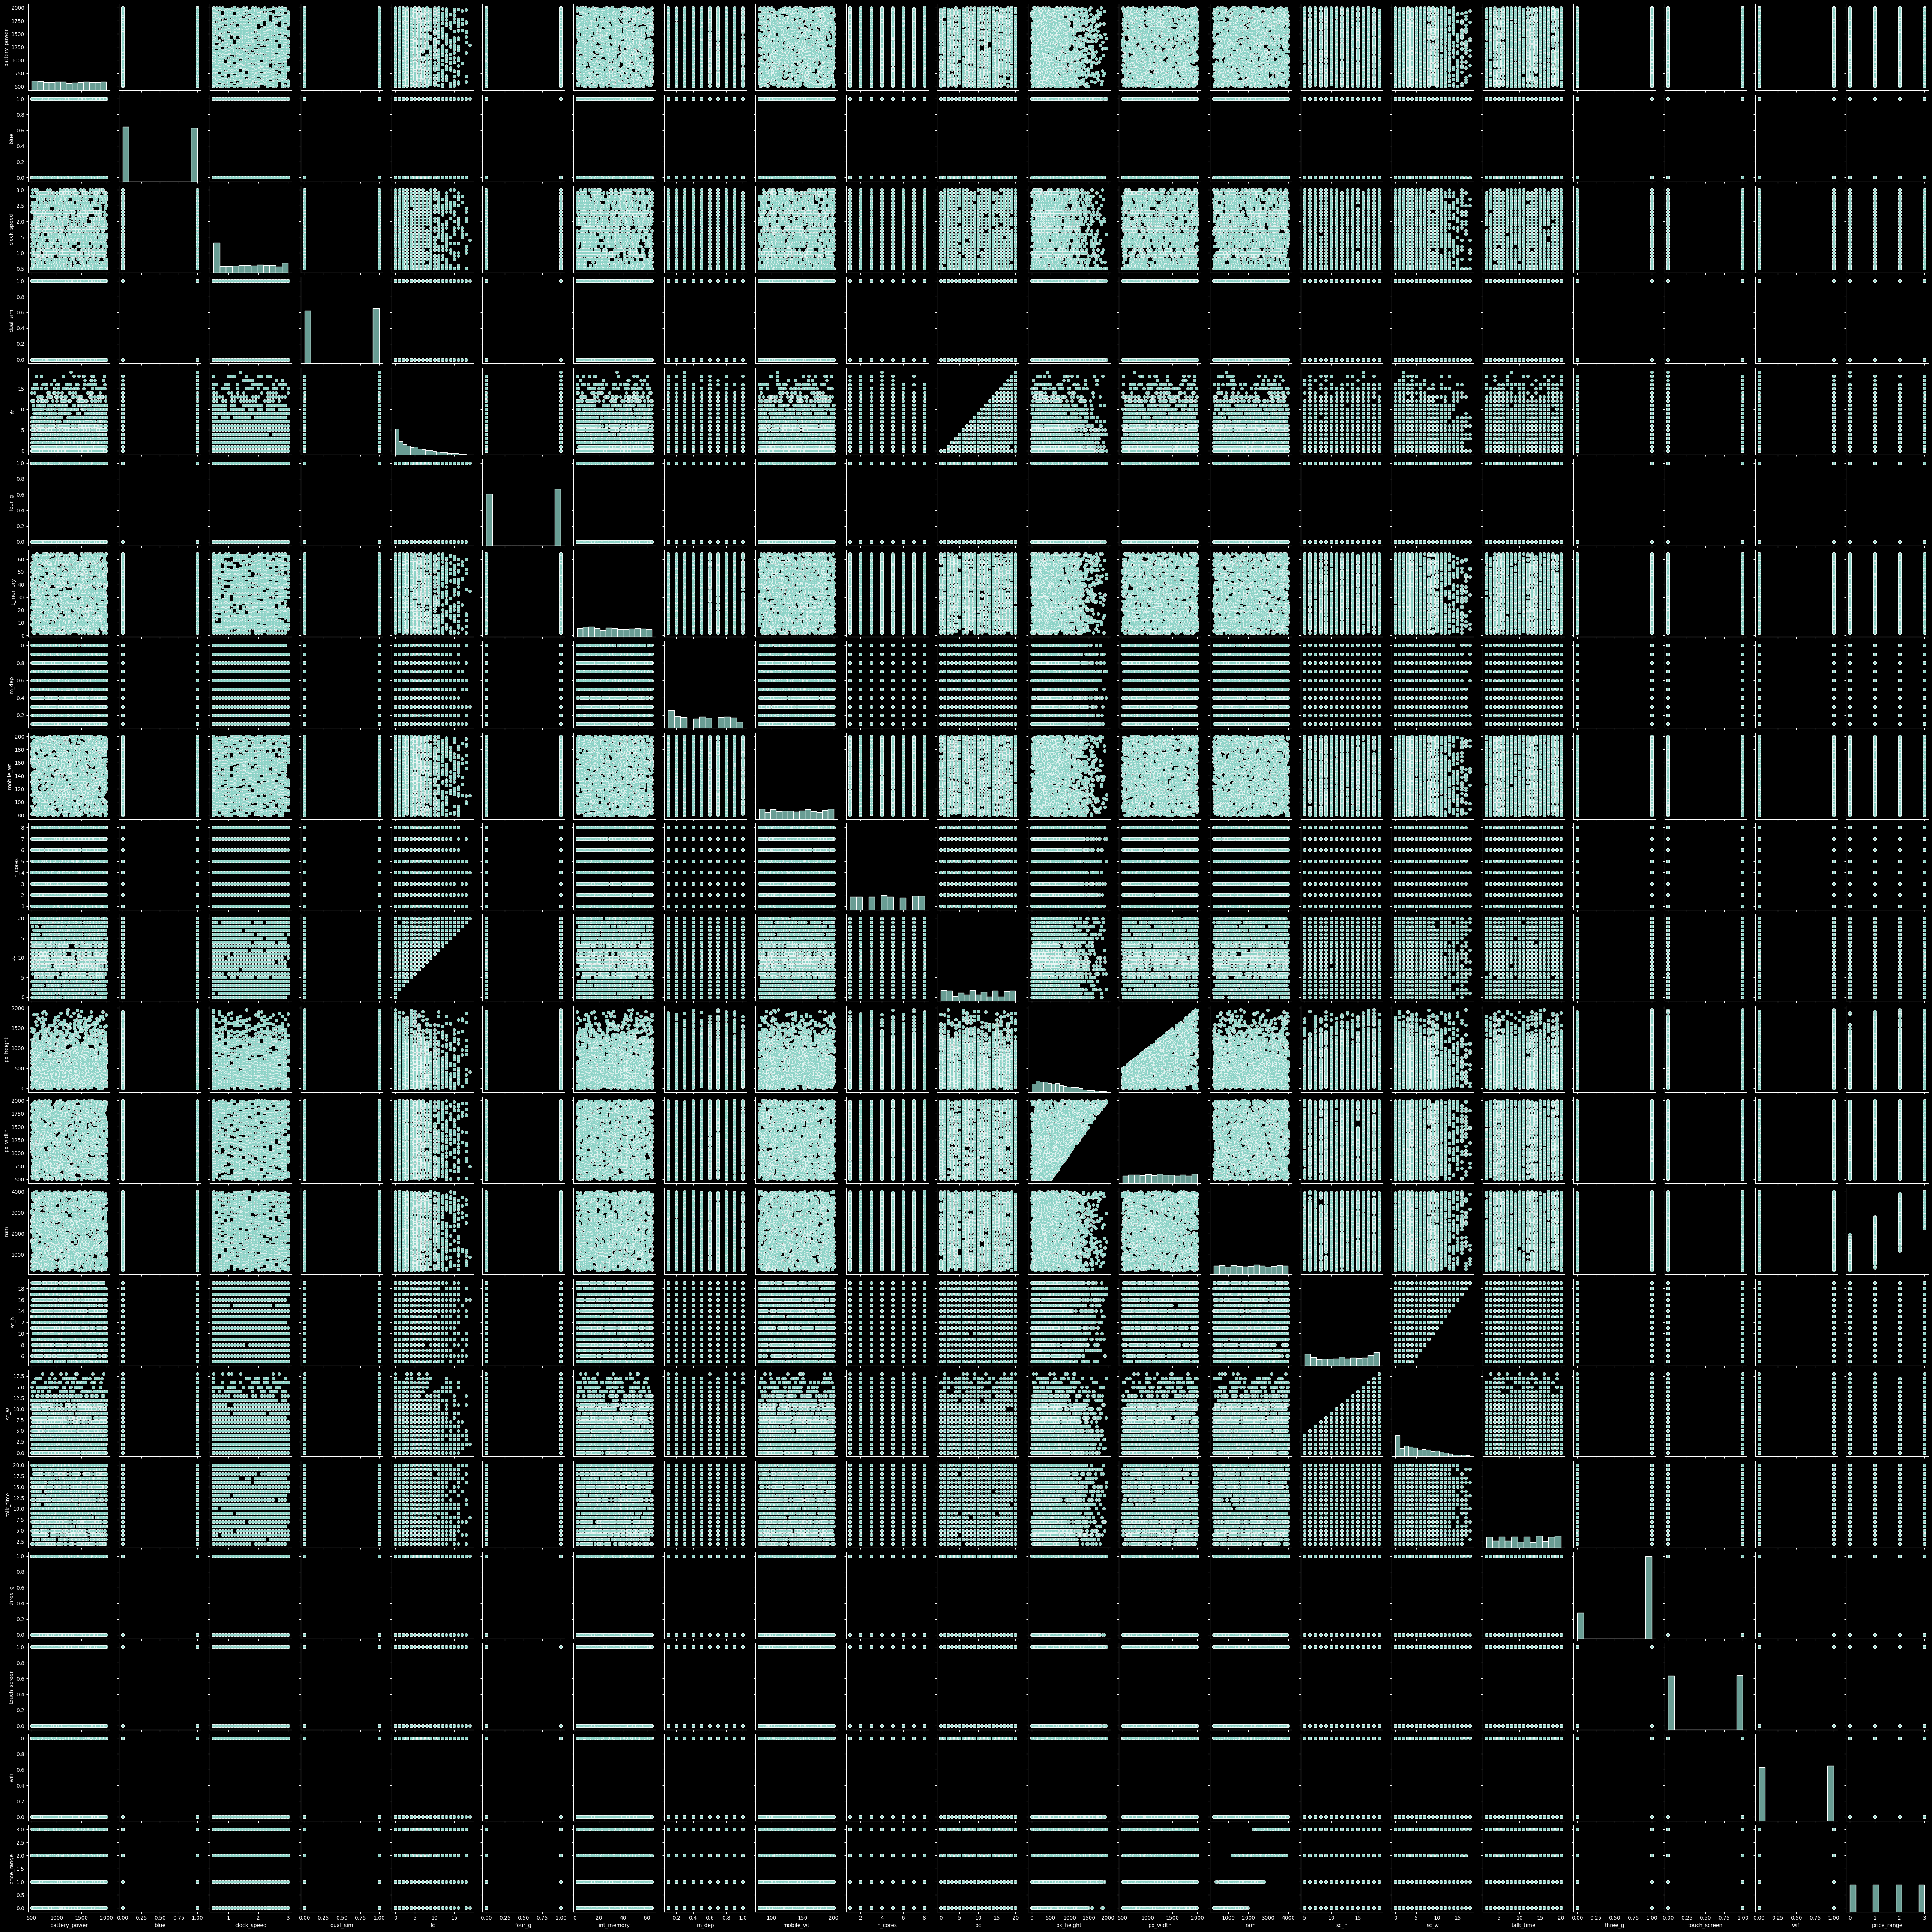

In [52]:
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.pairplot(total_df)
plt.show()

Classifaction Algorithms

In [137]:
train_scores.clear()
test_scores.clear()
accurracy_scores=[]

1-Logistic Regression

training Scoore:  0.8701492537313433
testing Scoore:  0.8378787878787879
classes:  [0 1 2 3]
training iterations  [31 17 26 48]
Accuracy: 0.8378787878787879
confusion metrix: [[167   1   0   0]
 [ 12 108  37   0]
 [  0  48 115   9]
 [  0   0   0 163]]


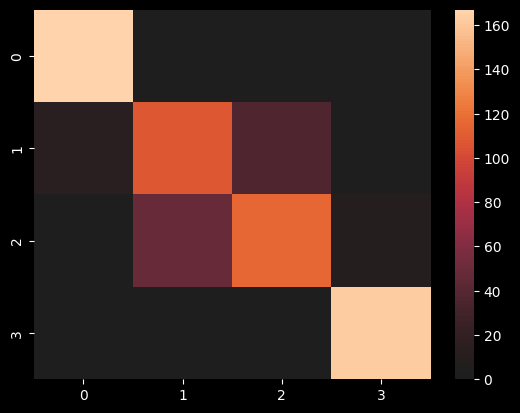

In [138]:
#import logestic model
from sklearn.linear_model import LogisticRegression
LRObject=LogisticRegression(random_state=33,solver='liblinear',penalty='l1',C=1,max_iter=50)
LRObject.fit(Xtrain,ytrain)
#Useful Printings
print('training Scoore: ',LRObject.score(Xtrain,ytrain))
print('testing Scoore: ',LRObject.score(Xtest,ytest))
######################################################
train_scores.append(LRObject.score(Xtrain,ytrain))
test_scores.append(LRObject.score(Xtest,ytest))
####################################################

print('classes: ',LRObject.classes_)
print('training iterations ',LRObject.n_iter_)
#test the data
y_predict=LRObject.predict(Xtest)
y_pred_prob=LRObject.predict_proba(Xtest)
accurracy_scores.append(accuracy_score(ytest,y_predict))
accuracy=accuracy_score(ytest,y_predict)
print(f'Accuracy: {accuracy}')
#confusion metrix
CM=confusion_matrix(ytest,y_predict)
print("confusion metrix:",CM)
sns.heatmap(CM,center=True)
plt.show()

In [105]:
train_scores

[0.8701492537313433]

2-SVC SVM classifier


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


(660,) (660,)
traing score 0.9977611940298508
testing score 0.956060606060606
confusiion matrix [[166   2   0   0]
 [  6 147   4   0]
 [  0   6 162   4]
 [  0   0   7 156]]


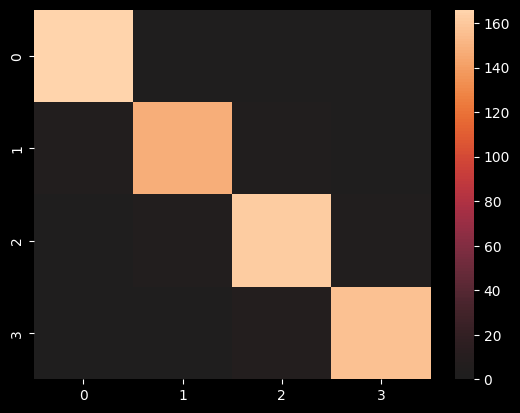

In [139]:
mode=SVC(C=0.008,kernel='poly',max_iter=10000,gamma='auto')
mode.fit(Xtrain,ytrain)
print(mode.predict(Xtest).shape,ytest.shape)
print('traing score',mode.score(Xtrain,ytrain))
print('testing score',mode.score(Xtest,ytest))
train_scores.append(mode.score(Xtrain,ytrain))
test_scores.append(mode.score(Xtest,ytest))
CM=confusion_matrix(ytest,mode.predict(Xtest))
accurracy_scores.append(accuracy_score(ytest,mode.predict(Xtest)))
print('confusiion matrix',CM)
sns.heatmap(CM,center=True)
plt.show()

3-Decision Tree Classifier

training score 0.9171641791044776
testing score 0.8333333333333334
classess [0 1 2 3]
feauturea [0.13790622 0.         0.         0.         0.         0.
 0.         0.00344931 0.00413408 0.         0.         0.05919623
 0.08960776 0.7057064  0.         0.         0.         0.
 0.         0.        ]
[[153  10   0   0]
 [ 15 132  21   0]
 [  0  15 137  35]
 [  0   0  14 128]]


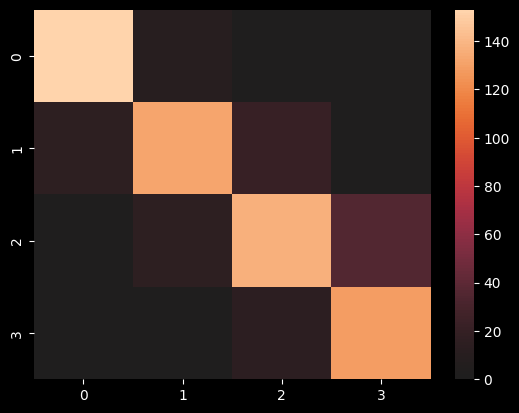

In [141]:
model=DecisionTreeClassifier(max_depth=6,random_state=33,criterion='entropy')
model.fit(Xtrain,ytrain)
print('training score',model.score(Xtrain,ytrain))
print('testing score',model.score(Xtest,ytest))
print('classess',model.classes_)
print('feauturea',model.feature_importances_)
###################################################
train_scores.append(model.score(Xtrain,ytrain))
test_scores.append(model.score(Xtest,ytest))
##################################################
ypred=model.predict(Xtest)
CM=confusion_matrix(ypred,ytest)
accurracy_scores.append(accuracy_score(ytest,ypred))
print(CM)
sns.heatmap(CM,center=True)
plt.show()

4-Random forest Classifier

Note i have tunned parameters like use max_depth 6 then increse to rech high accuracy and change permutatin fon nestimators to choose the best of the model

training score 0.9940298507462687
testing score 0.8424242424242424
[0.06926053 0.00580629 0.02496319 0.00741645 0.02221512 0.00653301
 0.03499748 0.02504865 0.0363817  0.0233236  0.0278757  0.05590156
 0.05588259 0.50178681 0.02428225 0.02648742 0.0326791  0.00469282
 0.00781856 0.00664715]


<Axes: >

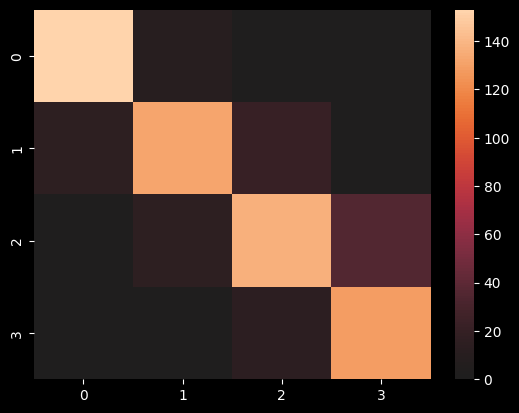

In [143]:
model=RandomForestClassifier(n_estimators=25,criterion='gini',random_state=44,max_depth=9)
model.fit(Xtrain,ytrain)
print('training score',model.score(Xtrain,ytrain))
print('testing score',model.score(Xtest,ytest))
###################################################
train_scores.append(model.score(Xtrain,ytrain))
test_scores.append(model.score(Xtest,ytest))
#################################################
print(model.feature_importances_)
y_pred=model.predict(Xtest)
CM=confusion_matrix(ypred,ytest)
accurracy_scores.append(accuracy_score(ytest,mode.predict(Xtest)))
#print(CM)
sns.heatmap(CM,center=True)

5-Gradient Boost Classifier

have tryed n_estimators 50-->100-->150 i am trying to put my knowledge to get the best of every model

training score 1.0
testing score 0.906060606060606
[1.40397380e-01 8.26739627e-05 2.37249100e-03 4.27932345e-04
 1.24819359e-03 8.39257025e-05 4.62699279e-03 2.01091431e-03
 3.09036875e-03 1.85335858e-03 2.71963310e-03 6.39125545e-02
 6.81535534e-02 7.01324248e-01 1.76725323e-03 2.53219589e-03
 2.88542362e-03 8.78538823e-05 2.92090858e-04 1.30962623e-04]
[[153  10   0   0]
 [ 15 132  21   0]
 [  0  15 137  35]
 [  0   0  14 128]]


<Axes: >

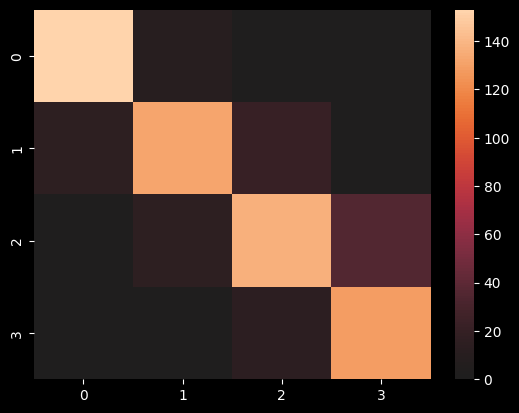

In [145]:
model=GradientBoostingClassifier(n_estimators=100,random_state=44,max_depth=4)
model.fit(Xtrain,ytrain)
print('training score',model.score(Xtrain,ytrain))
print('testing score',model.score(Xtest,ytest))
print(model.feature_importances_)
###############################################
train_scores.append(model.score(Xtrain,ytrain))
test_scores.append(model.score(Xtest,ytest))
###############################################
y_pred=model.predict(Xtest)
CM=confusion_matrix(ypred,ytest)
accurracy_scores.append(accuracy_score(ytest,mode.predict(Xtest)))
print(CM)
sns.heatmap(CM,center=True)

6-KNN Classifier

here i am trying to spot how tnning the number of naeighbours affect the performance of the algoritthm and its score

training score 1.0
testing score 0.8893939393939394
[[160  11   0   0]
 [  8 136  15   0]
 [  0  10 143  15]
 [  0   0  14 148]]


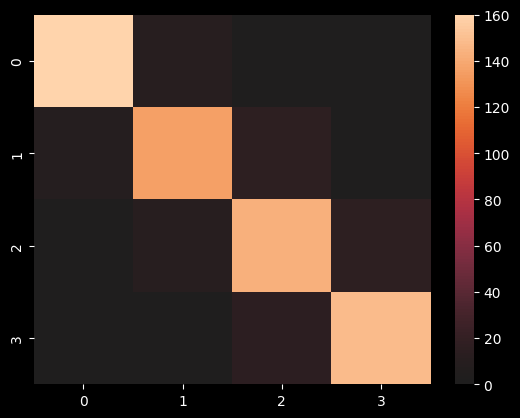

training score 1.0
testing score 0.9106060606060606
[[165   8   0   0]
 [  3 140  16   0]
 [  0   9 149  16]
 [  0   0   7 147]]


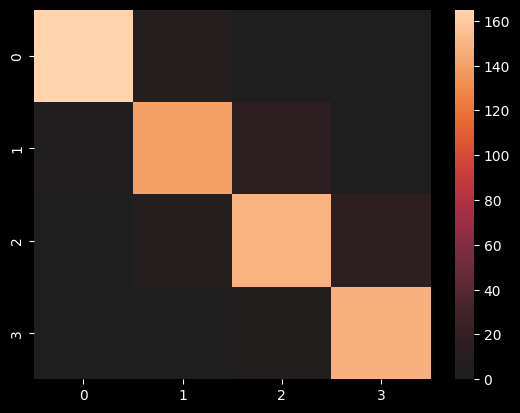

training score 1.0
testing score 0.9075757575757576
[[164   8   0   0]
 [  4 142  17   0]
 [  0   7 147  17]
 [  0   0   8 146]]


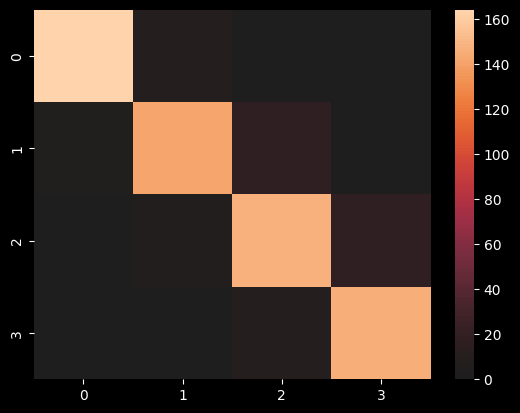

training score 1.0
testing score 0.9151515151515152
[[166   9   0   0]
 [  2 143  15   0]
 [  0   5 151  19]
 [  0   0   6 144]]


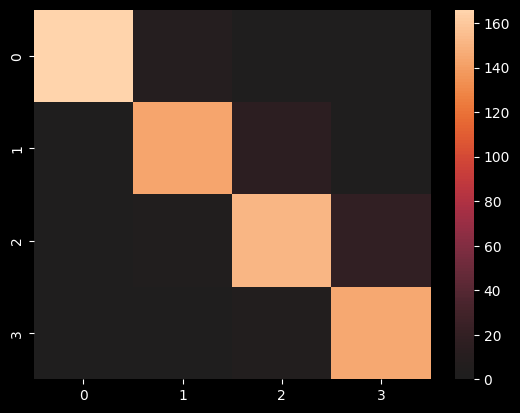

training score 1.0
testing score 0.9106060606060606
[[164   9   0   0]
 [  4 142  15   0]
 [  0   6 151  19]
 [  0   0   6 144]]


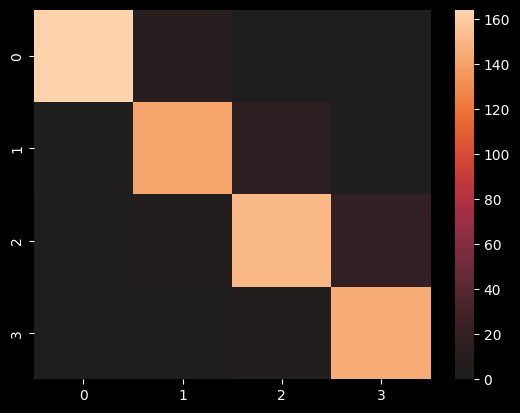

training score 1.0
testing score 0.9151515151515152
[[166   8   0   0]
 [  2 142  15   0]
 [  0   7 151  18]
 [  0   0   6 145]]


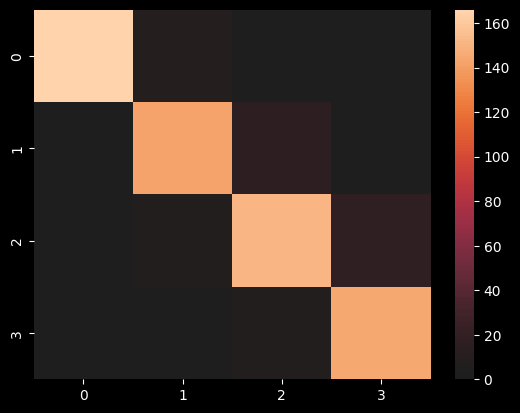

training score 1.0
testing score 0.9136363636363637
[[165   8   0   0]
 [  3 141  16   0]
 [  0   8 151  17]
 [  0   0   5 146]]


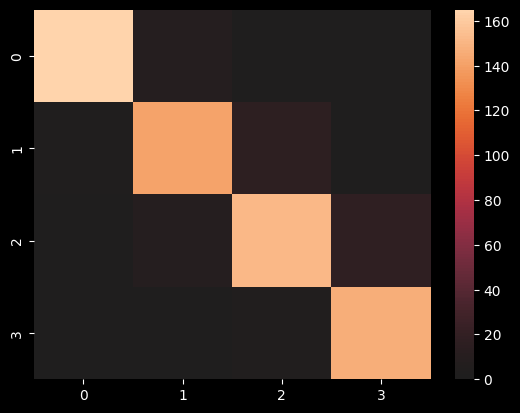

training score 1.0
testing score 0.9212121212121213
[[166   7   0   0]
 [  2 143  16   0]
 [  0   7 151  15]
 [  0   0   5 148]]


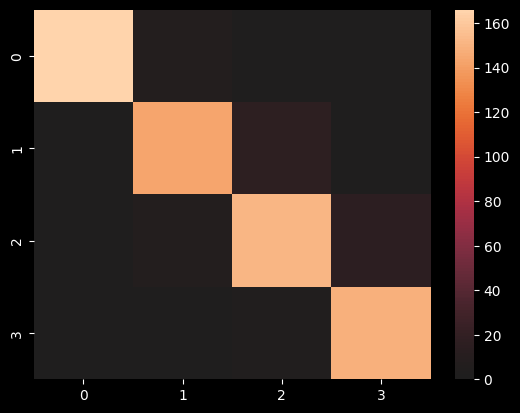

training score 1.0
testing score 0.9242424242424242
[[166   7   0   0]
 [  2 143  15   0]
 [  0   7 152  14]
 [  0   0   5 149]]


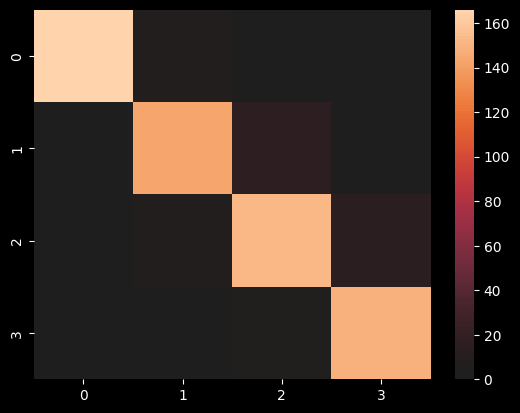

In [146]:
for i in range (2,11):
    model=KNeighborsClassifier(n_neighbors=i,algorithm='auto',weights='distance')
    model.fit(Xtrain,ytrain)
    print('training score',model.score(Xtrain,ytrain))
    print('testing score',model.score(Xtest,ytest))
    if i == 10:
      train_scores.append(model.score(Xtrain,ytrain))
      test_scores.append(model.score(Xtest,ytest))
    y_pred=model.predict(Xtest)
    CM=confusion_matrix(y_pred,ytest)
    if i == 10:
       accurracy_scores.append(accuracy_score(ytest,mode.predict(Xtest)))
    plt.style.use('dark_background')
    print(CM)
    sns.heatmap(CM,center=True)
    plt.show()

In [116]:
test_scores

[0.8378787878787879,
 0.956060606060606,
 0.8333333333333334,
 0.8424242424242424,
 0.906060606060606,
 0.9242424242424242]

Plotting Algorithms Scores

A-Training Scores

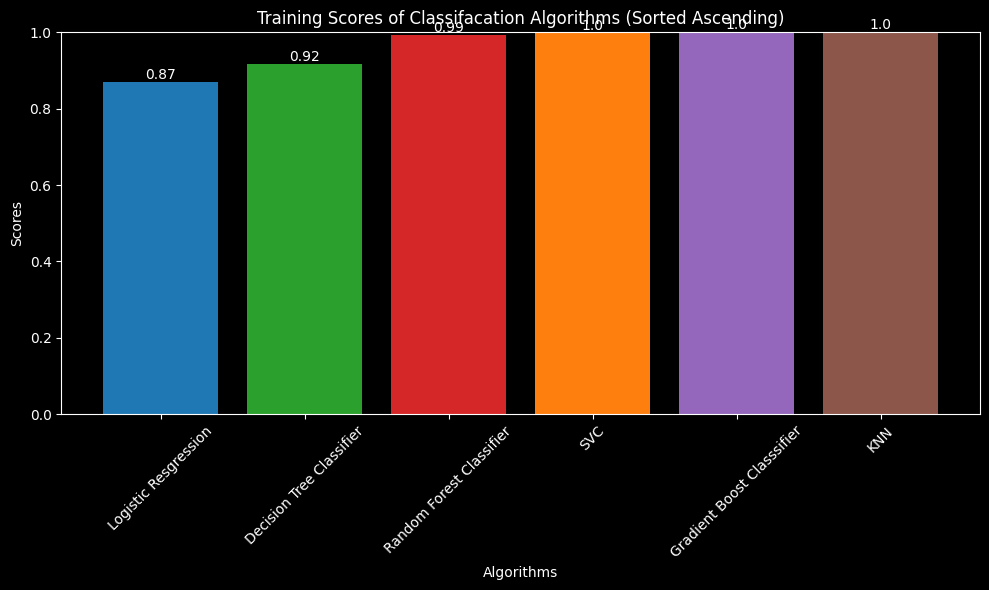

In [118]:
# Algorithm names
algorithms = ['Logistic Resgression', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boost Classsifier', 'KNN']


# Color for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Sort the algorithms and accuracy_scores based on accuracy scores
sorted_data = sorted(zip(algorithms, train_scores, colors), key=lambda x: x[1])

# Unpack the sorted data
sorted_algorithms, sorted_training_scores, sorted_colors = zip(*sorted_data)

# Create bar plot with specific colors
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_algorithms, sorted_training_scores, color=sorted_colors)
plt.title('Training Scores of Classifacation Algorithms (Sorted Ascending)')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for bar, score in zip(bars, sorted_training_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

B-Testing Scores

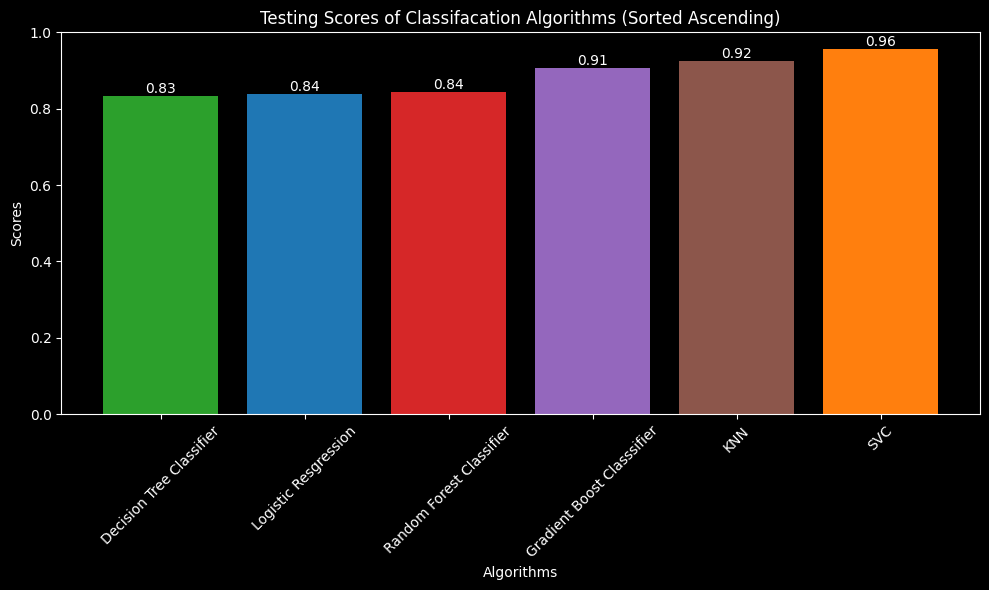

In [117]:
# Algorithm names
algorithms = ['Logistic Resgression', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boost Classsifier', 'KNN']


# Color for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Sort the algorithms and accuracy_scores based on accuracy scores
sorted_data = sorted(zip(algorithms, test_scores, colors), key=lambda x: x[1])

# Unpack the sorted data
sorted_algorithms, sorted_testing_scores, sorted_colors = zip(*sorted_data)

# Create bar plot with specific colors
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_algorithms, sorted_testing_scores, color=sorted_colors)
plt.title('Testing Scores of Classifacation Algorithms (Sorted Ascending)')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for bar, score in zip(bars, sorted_testing_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

the anylsis shows that svc and knn and gradient boost classifier showed good performance so lets add final plottings of classes

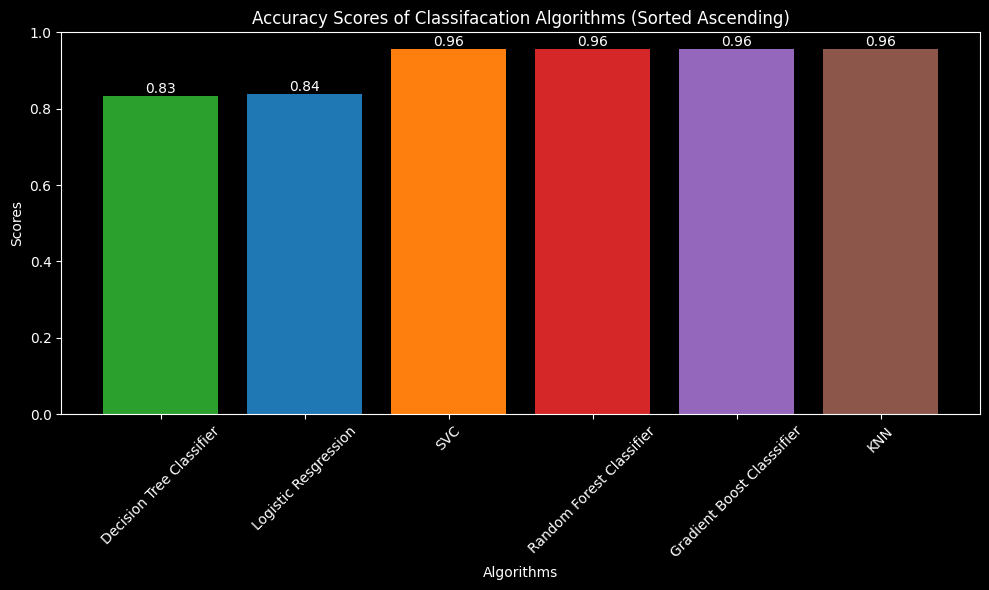

In [147]:
# Algorithm names
algorithms = ['Logistic Resgression', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boost Classsifier', 'KNN']


# Color for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Sort the algorithms and accuracy_scores based on accuracy scores
sorted_data = sorted(zip(algorithms, accurracy_scores, colors), key=lambda x: x[1])

# Unpack the sorted data
sorted_algorithms, sorted_training_scores, sorted_colors = zip(*sorted_data)

# Create bar plot with specific colors
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_algorithms, sorted_training_scores, color=sorted_colors)
plt.title('Accuracy Scores of Classifacation Algorithms (Sorted Ascending)')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for bar, score in zip(bars, sorted_training_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()